In [286]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/driving-behavior/train_motion_data.csv
/kaggle/input/driving-behavior/test_motion_data.csv


In [287]:
import pandas as pd

In [288]:
motion_df = pd.read_csv("/kaggle/input/driving-behavior/train_motion_data.csv")

In [289]:
motion_df.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [290]:
print(motion_df['Class'].unique())


['NORMAL' 'AGGRESSIVE' 'SLOW']


In [291]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = motion_df.iloc[:, -2]

mapping = {'AGGRESSIVE': 2, 'NORMAL': 1, 'SLOW': 0}

motion_df['Class'] = motion_df['Class'].map(mapping)

del motion_df['Timestamp']


features = [x for x in motion_df.columns if x not in ["Class"]]
x_train, x_dev, y_train, y_dev = train_test_split(motion_df[features], 
                                          motion_df['Class'],
                                          train_size=0.8,
                                          random_state=42)



In [292]:
x_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
2780,0.137111,-0.298605,-0.994787,0.025809,0.095295,0.001145
2984,0.074626,0.007001,0.071194,-0.029169,-0.031154,0.013974
2283,2.251131,1.144779,-0.537735,-0.013897,0.276111,-0.157069
1801,0.233809,0.382366,-0.177023,0.014813,-0.029932,0.045739
3007,0.528801,-0.429284,-0.422739,0.028253,-0.043371,-0.004963
...,...,...,...,...,...,...
1130,1.203701,1.508985,0.595385,-0.023671,-0.007941,-0.007407
1294,-0.370246,0.413667,0.194447,-0.022449,-0.126449,-0.009239
860,0.623902,-0.108246,-0.358455,-0.010843,0.030543,-0.047113
3507,1.243437,0.290620,-1.453245,0.030696,0.050091,-0.092928


In [293]:
motion_df['Class']

0       1
1       1
2       1
3       1
4       1
       ..
3639    0
3640    0
3641    0
3642    0
3643    0
Name: Class, Length: 3644, dtype: int64

In [294]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l1
from sklearn.preprocessing import StandardScaler



model = Sequential([
    Dense(units=24, activation='relu', input_shape=(6,)),
    Dense(units=9, activation='relu'),
    Dense(units=3, activation='softmax')  # 3 output units for 3 classes
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_dev = scaler.transform(x_dev)

model.fit(x_train, y_train, epochs=500)

Epoch 1/500
92/92 [==============================] - 1s 2ms/step - loss: 1.1294 - accuracy: 0.3259
Epoch 2/500
92/92 [==============================] - 0s 2ms/step - loss: 1.0970 - accuracy: 0.3736
Epoch 3/500
92/92 [==============================] - 0s 2ms/step - loss: 1.0834 - accuracy: 0.3986
Epoch 4/500
92/92 [==============================] - 0s 2ms/step - loss: 1.0733 - accuracy: 0.4130
Epoch 5/500
92/92 [==============================] - 0s 2ms/step - loss: 1.0652 - accuracy: 0.4172
Epoch 6/500
92/92 [==============================] - 0s 2ms/step - loss: 1.0579 - accuracy: 0.4305
Epoch 7/500
92/92 [==============================] - 0s 2ms/step - loss: 1.0524 - accuracy: 0.4357
Epoch 8/500
92/92 [==============================] - 0s 2ms/step - loss: 1.0482 - accuracy: 0.4456
Epoch 9/500
92/92 [==============================] - 0s 2ms/step - loss: 1.0451 - accuracy: 0.4415
Epoch 10/500
92/92 [==============================] - 0s 2ms/step - loss: 1.0417 - accuracy: 0.4518
Epoch 11/

In [295]:
y_train

2780    0
2984    0
2283    2
1801    2
3007    0
       ..
1130    1
1294    2
860     1
3507    0
3174    0
Name: Class, Length: 2915, dtype: int64

In [296]:
x_train

array([[ 0.0852926 , -0.22241642, -1.01421045,  0.35168342,  0.73822158,
        -0.05135031],
       [ 0.02198717,  0.1179575 ,  0.07340476, -0.47786599, -0.2399435 ,
         0.05809226],
       [ 2.22707463,  1.38517757, -0.54788227, -0.24743559,  2.13695053,
        -1.40114204],
       ...,
       [ 0.57847567, -0.0104013 , -0.36496344, -0.20134952,  0.23732546,
        -0.46306285],
       [ 1.2061466 ,  0.4338434 , -1.48197295,  0.42542115,  0.38853939,
        -0.85392911],
       [-0.11402652, -0.54972399,  2.04411324, -0.57003813, -2.45617268,
        -0.11910047]])

92/92 [==============================] - 0s 1ms/step


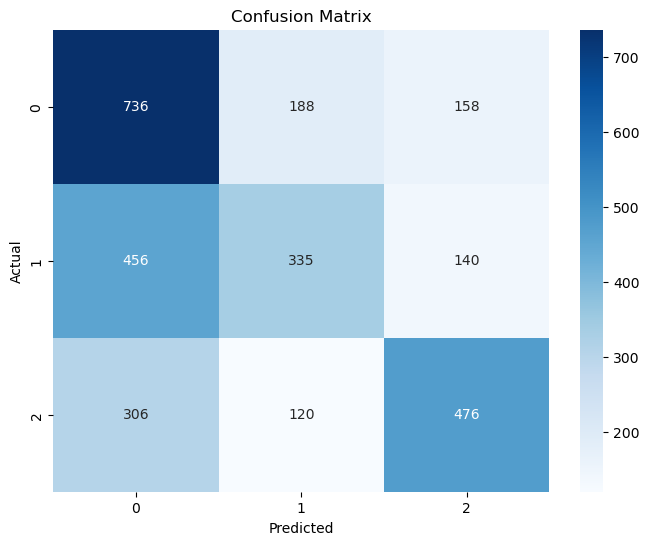

In [297]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a test set, x_test and y_test
# Make predictions using the model
y_pred_probs = model.predict(x_train)

# Convert predictions from logits to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [298]:
from sklearn.metrics import accuracy_score, classification_report

report = classification_report(y_train, y_pred_classes, target_names=['Aggressive', 'Normal', 'Slow'])
print(report)

              precision    recall  f1-score   support

  Aggressive       0.49      0.68      0.57      1082
      Normal       0.52      0.36      0.43       931
        Slow       0.61      0.53      0.57       902

    accuracy                           0.53      2915
   macro avg       0.54      0.52      0.52      2915
weighted avg       0.54      0.53      0.52      2915



In [299]:
y_pred_probs_dev = model.predict(x_dev)

# Convert predictions from logits to class labels
y_pred_classes_dev = np.argmax(y_pred_probs_dev, axis=1)

report = classification_report(y_dev, y_pred_classes_dev, target_names=['Aggressive', 'Normal', 'Slow'])
print(report)

23/23 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

  Aggressive       0.39      0.60      0.47       249
      Normal       0.46      0.25      0.32       269
        Slow       0.40      0.38      0.39       211

    accuracy                           0.40       729
   macro avg       0.42      0.41      0.39       729
weighted avg       0.42      0.40      0.39       729



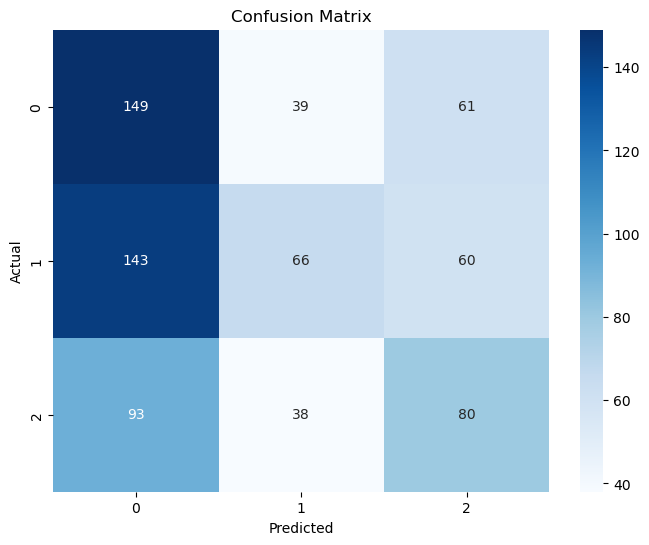

In [300]:
cm_1 = confusion_matrix(y_dev, y_pred_classes_dev)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()